Number of HLA alleles: 7044
Number of samples: 102180
ROC curve saved as 'roc_curve.png'


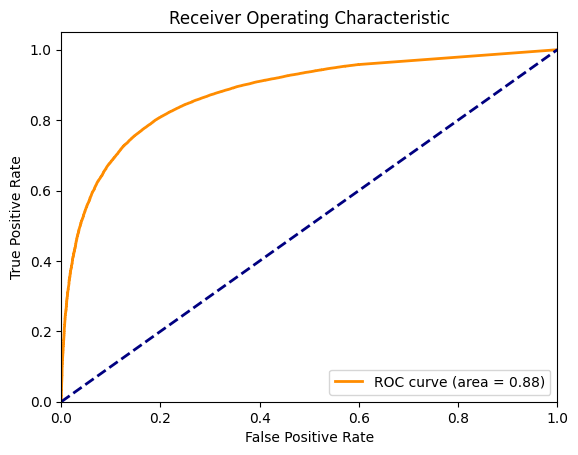

In [5]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from utils.model import *
from utils.dataprovider import DataProvider
from utils.encoder import encode_data

checkpoint_name = 'base_model0-best'
model_name = 'DeepNeo'
hla_path = "dataset/HLAseq.dat"

# 모델 로드
model = model_map[model_name]
model.load_state_dict(torch.load(f"models/{checkpoint_name}.pt"))
model.eval()

# 새로운 데이터 파일 경로
new_data_file = 'dataset/mhc1.testset.tsv'

# DataProvider 객체 생성 시 경로 전달
data_provider = DataProvider(epi_path=new_data_file, hla_path=hla_path)

# 데이터 인코딩
x, y = encode_data(data_provider)

# 데이터를 텐서로 변환
x = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# 예측 수행
with torch.no_grad():
    y_pred = model(x).numpy()

# ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y.numpy(), y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('roc_curve.png')  # 그래프를 파일로 저장
print("ROC curve saved as 'roc_curve.png'")